<a href="https://colab.research.google.com/github/BitanGh/udemy/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
from re import X
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=1000, n_features= 3, n_informative=2, n_redundant=1, n_classes=2, random_state=42)


In [9]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [10]:
X

array([[ 2.48547786,  2.39963589, -1.46526917],
       [ 2.20403962, -1.06965652,  0.00979545],
       [-0.5726534 , -0.75494788,  0.42032991],
       ...,
       [-0.41608875,  0.46668963, -0.11024494],
       [-1.57936997,  2.48498245, -0.71060102],
       [-0.43277356,  0.89093028, -0.28069604]])

In [13]:
classifier = KNeighborsClassifier(n_neighbors=5, p=2, algorithm= 'auto')
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
y_pred = classifier.predict(X_test)

In [15]:
#accuracy values, confusion matrix, classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       122
           1       0.91      0.91      0.91       128

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250



0.904

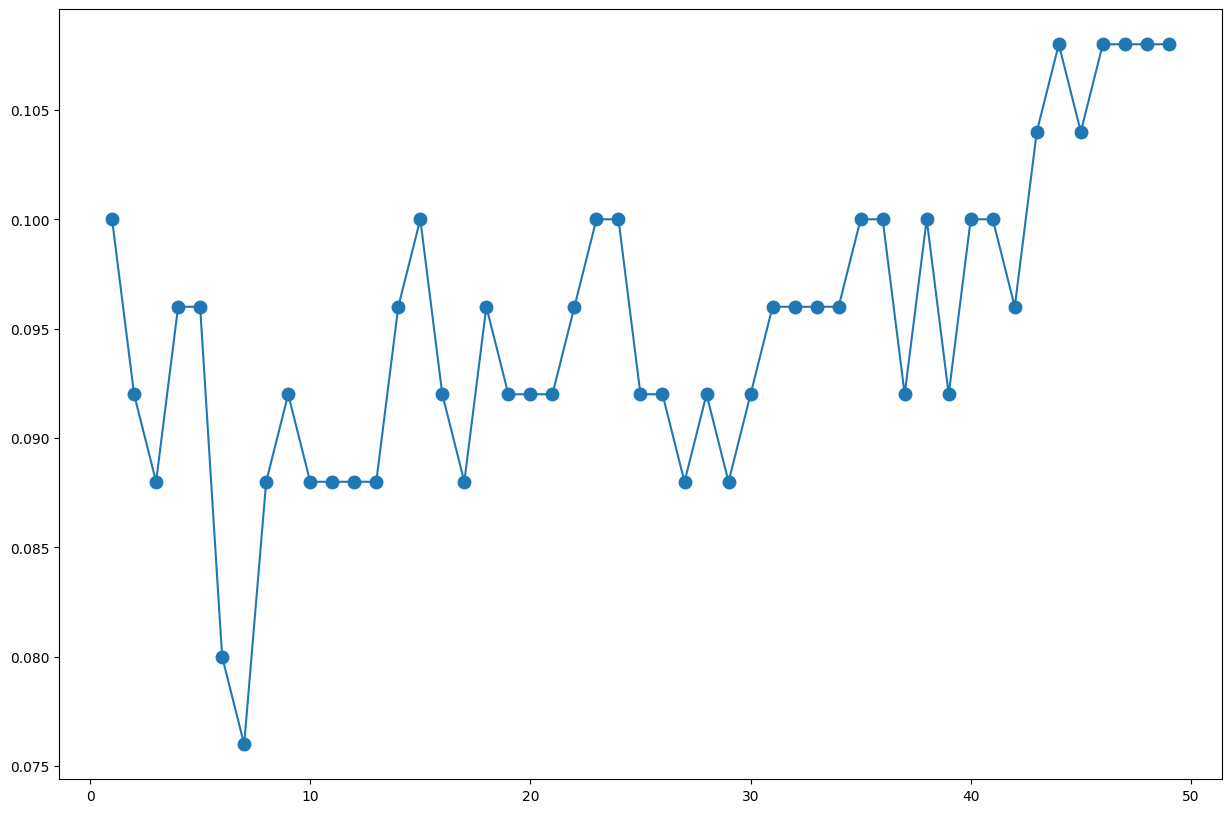

In [16]:
#Hyperparameter tuning using GridSearch CV
error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

plt.figure(figsize=(15,10))
plt.plot(range(1,50),error_rate, marker='o', markersize=9)

In [19]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': [1,2,3,4,5,6,7,8,9],  # Test different values of k
    'weights': ['uniform', 'distance'],  # Test different weight functions
    'metric': ['euclidean', 'manhattan']  # Test different distance metrics
}
grid_search = GridSearchCV(knn, param_grid, cv=5) # cv = 5 specifies 5-fold cross-validation

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best parameters:", grid_search.best_params_)

# Get the best model
best_knn = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_knn.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print("Best model accuracy:", accuracy)

Best parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Best model accuracy: 0.924
